In [5]:
import librosa
import numpy as np

# Par√¢metros
audio_path = '../audio/15-11 - 1_00000_000.wav'
block_duration = 10  # segundos
sr = 24000  # taxa de amostragem usada na grava√ß√£o

# Carrega dura√ß√£o total do √°udio
duration = librosa.get_duration(path=audio_path)
print(f'Dura√ß√£o total: {duration/60:.1f} minutos')

bugio_times = []

# An√°lise por blocos
for start in np.arange(0, duration, block_duration):
    y, _ = librosa.load(audio_path, sr=sr, offset=start, duration=block_duration)

    # Filtro de energia simples
    energy = np.sum(y**2)
    if energy > 0.01:  # Limiar ajust√°vel
        # Poder√≠amos aplicar mais filtros aqui (ex: MFCCs ou an√°lise espectral)
        bugio_times.append((start, start + block_duration))

print("Poss√≠veis vocaliza√ß√µes de bugios entre:")
for start, end in bugio_times:
    print(f"{start/60:.2f} min ‚Äì {end/60:.2f} min")

Dura√ß√£o total: 60.0 minutos
Poss√≠veis vocaliza√ß√µes de bugios entre:
0.00 min ‚Äì 0.17 min
0.17 min ‚Äì 0.33 min
0.33 min ‚Äì 0.50 min
0.50 min ‚Äì 0.67 min
0.67 min ‚Äì 0.83 min
0.83 min ‚Äì 1.00 min
1.00 min ‚Äì 1.17 min
1.17 min ‚Äì 1.33 min
1.33 min ‚Äì 1.50 min
1.50 min ‚Äì 1.67 min
1.67 min ‚Äì 1.83 min
1.83 min ‚Äì 2.00 min
2.00 min ‚Äì 2.17 min
2.17 min ‚Äì 2.33 min
2.33 min ‚Äì 2.50 min
2.50 min ‚Äì 2.67 min
2.67 min ‚Äì 2.83 min
2.83 min ‚Äì 3.00 min
3.00 min ‚Äì 3.17 min
3.17 min ‚Äì 3.33 min
3.33 min ‚Äì 3.50 min
3.50 min ‚Äì 3.67 min
3.67 min ‚Äì 3.83 min
3.83 min ‚Äì 4.00 min
4.00 min ‚Äì 4.17 min
4.17 min ‚Äì 4.33 min
4.33 min ‚Äì 4.50 min
4.50 min ‚Äì 4.67 min
4.67 min ‚Äì 4.83 min
4.83 min ‚Äì 5.00 min
5.00 min ‚Äì 5.17 min
5.17 min ‚Äì 5.33 min
5.33 min ‚Äì 5.50 min
5.50 min ‚Äì 5.67 min
5.67 min ‚Äì 5.83 min
5.83 min ‚Äì 6.00 min
6.00 min ‚Äì 6.17 min
6.17 min ‚Äì 6.33 min
6.33 min ‚Äì 6.50 min
6.50 min ‚Äì 6.67 min
6.67 min ‚Äì 6.83 min
6.83 min ‚Äì 7.00 min
7.0

In [7]:
import librosa
import numpy as np

#audio_path = 'audio/FLONA_20241115_080000_000.wav'
sr = 24000  # ou use sr=None para pegar o original

# Trecho com bugios
start_bugio = 1697
duration = 7  # segundos

y_bugio, _ = librosa.load(audio_path, sr=sr, offset=start_bugio, duration=duration)
energy_bugio = np.sum(y_bugio**2)

print(f"üîä Energia no trecho com bugios: {energy_bugio:.6f}")

# Trecho sem bugios (exemplo aleat√≥rio)
y_vazio, _ = librosa.load(audio_path, sr=sr, offset=start_bugio-7, duration=7)
energy_vazio = np.sum(y_vazio**2)

print(f"ü§´ Energia em trecho sem bugios: {energy_vazio:.6f}")


üîä Energia no trecho com bugios: 847.461365
ü§´ Energia em trecho sem bugios: 696.634888


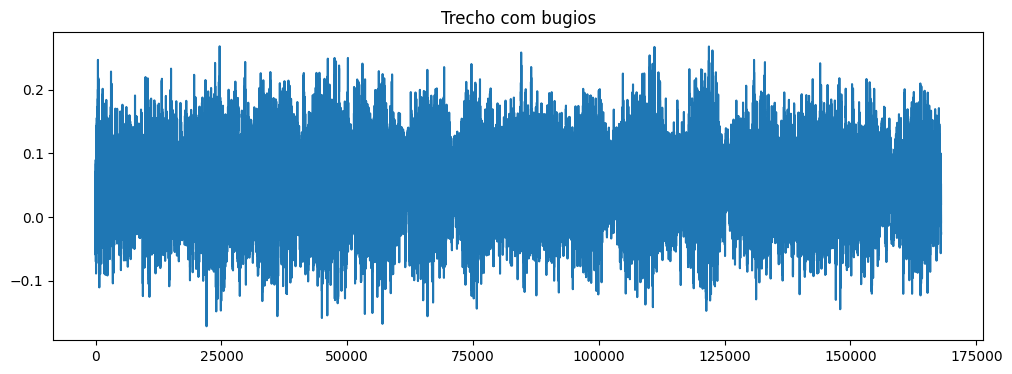

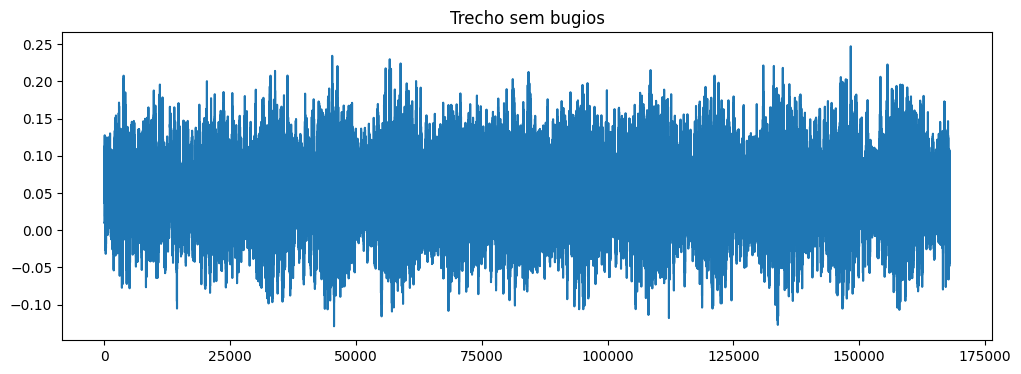

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(y_bugio)
plt.title('Trecho com bugios')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(y_vazio)
plt.title('Trecho sem bugios')
plt.show()


In [13]:
import librosa
import numpy as np

#audio_path = '../audio/FLONA_20241115_080000_000.wav'
y, sr = librosa.load(audio_path, sr=None)

# Dura√ß√£o da janela em segundos
window_duration = 10
window_samples = window_duration * sr

# Lista para guardar trechos com poss√≠vel vocaliza√ß√£o
bugio_intervals = []

# Define o threshold de energia
energy_threshold = 1800

# Percorre o √°udio em janelas de 10s
for start in range(0, len(y), window_samples):
    end = min(start + window_samples, len(y))
    window = y[start:end]
    energy = np.sum(window ** 2)
    
    if energy > energy_threshold:
        start_min = start / sr / 60
        end_min = end / sr / 60
        bugio_intervals.append((round(start_min, 2), round(end_min, 2)))

# Exibe os intervalos detectados
for start, end in bugio_intervals:
    print(f"üü¢ Poss√≠vel bugio entre {start:.2f} e {end:.2f} min")


üü¢ Poss√≠vel bugio entre 8.67 e 8.83 min
üü¢ Poss√≠vel bugio entre 19.83 e 20.00 min
üü¢ Poss√≠vel bugio entre 30.67 e 30.83 min
üü¢ Poss√≠vel bugio entre 34.33 e 34.50 min
üü¢ Poss√≠vel bugio entre 36.33 e 36.50 min
üü¢ Poss√≠vel bugio entre 36.67 e 36.83 min
üü¢ Poss√≠vel bugio entre 37.00 e 37.17 min
üü¢ Poss√≠vel bugio entre 38.50 e 38.67 min
üü¢ Poss√≠vel bugio entre 42.00 e 42.17 min
üü¢ Poss√≠vel bugio entre 42.33 e 42.50 min
üü¢ Poss√≠vel bugio entre 43.17 e 43.33 min
üü¢ Poss√≠vel bugio entre 43.33 e 43.50 min
üü¢ Poss√≠vel bugio entre 52.00 e 52.17 min
üü¢ Poss√≠vel bugio entre 56.33 e 56.50 min


In [14]:
import librosa
import numpy as np
import scipy.signal

# Carrega o √°udio
y, sr = librosa.load(audio_path, sr=None)

# Aplica filtro passa-faixa (300 Hz a 1500 Hz)
sos = scipy.signal.butter(10, [300, 1500], btype='bandpass', fs=sr, output='sos')
y_filtered = scipy.signal.sosfilt(sos, y)

# Usa o mesmo script de janelas e energia com `y_filtered` no lugar de `y`


In [18]:
import librosa
import numpy as np

#audio_path = '../audio/FLONA_20241115_080000_000.wav'
y_filtered, sr = librosa.load(audio_path, sr=None)

# Dura√ß√£o da janela em segundos
window_duration = 10
window_samples = window_duration * sr

# Lista para guardar trechos com poss√≠vel vocaliza√ß√£o
bugio_intervals = []

# Define o threshold de energia
energy_threshold = 2000

# Percorre o √°udio em janelas de 10s
for start in range(0, len(y), window_samples):
    end = min(start + window_samples, len(y))
    window = y[start:end]
    energy = np.sum(window ** 2)
    
    if energy > energy_threshold:
        start_min = start / sr / 60
        end_min = end / sr / 60
        bugio_intervals.append((round(start_min, 2), round(end_min, 2)))

# Exibe os intervalos detectados
for start, end in bugio_intervals:
    print(f"üü¢ Poss√≠vel bugio entre {start:.2f} e {end:.2f} min")

üü¢ Poss√≠vel bugio entre 19.83 e 20.00 min
üü¢ Poss√≠vel bugio entre 30.67 e 30.83 min
üü¢ Poss√≠vel bugio entre 34.33 e 34.50 min
üü¢ Poss√≠vel bugio entre 36.33 e 36.50 min
üü¢ Poss√≠vel bugio entre 36.67 e 36.83 min
üü¢ Poss√≠vel bugio entre 37.00 e 37.17 min
üü¢ Poss√≠vel bugio entre 38.50 e 38.67 min
üü¢ Poss√≠vel bugio entre 42.00 e 42.17 min
üü¢ Poss√≠vel bugio entre 42.33 e 42.50 min
üü¢ Poss√≠vel bugio entre 43.17 e 43.33 min
üü¢ Poss√≠vel bugio entre 52.00 e 52.17 min


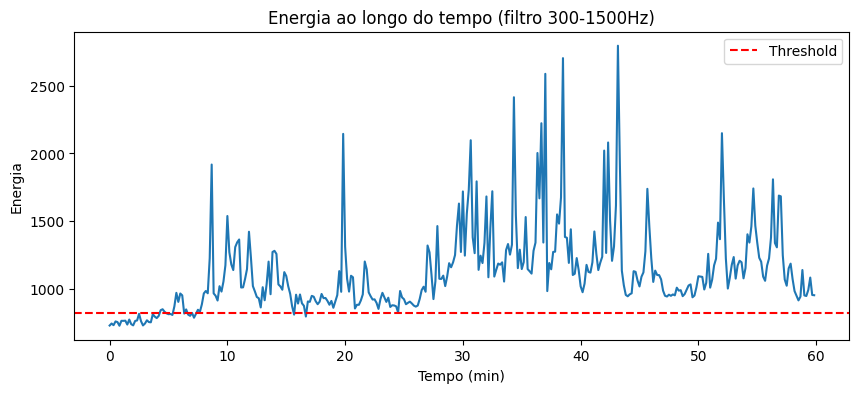

In [16]:
import matplotlib.pyplot as plt

energies = []
times = []

for start in range(0, len(y_filtered), window_samples):
    end = min(start + window_samples, len(y_filtered))
    window = y_filtered[start:end]
    energy = np.sum(window ** 2)
    energies.append(energy)
    times.append(start / sr / 60)  # em minutos

plt.figure(figsize=(10, 4))
plt.plot(times, energies)
plt.axhline(y=energy_threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel("Tempo (min)")
plt.ylabel("Energia")
plt.title("Energia ao longo do tempo (filtro 300-1500Hz)")
plt.legend()
plt.show()


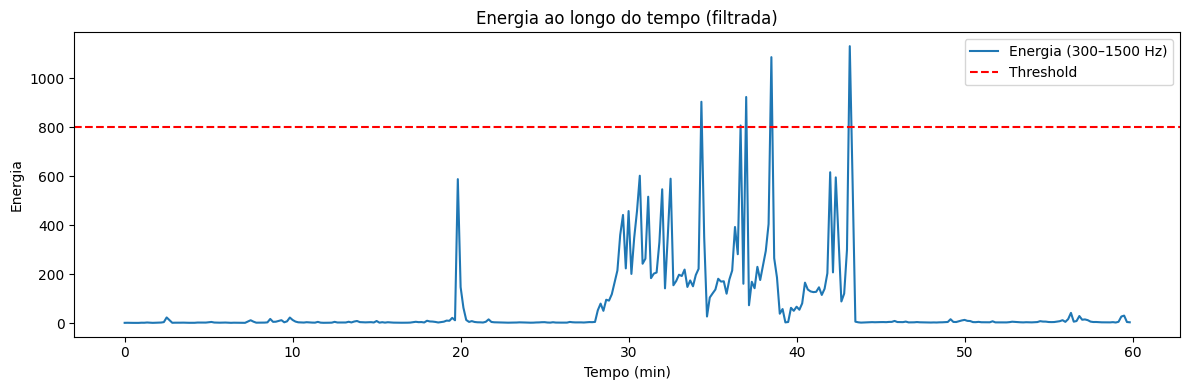

üìç Intervalos com energia acima do limiar:
 - 34:20
 - 36:39
 - 37:00
 - 38:30
 - 43:09


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

# üìÇ Carrega o √°udio
audio_path = '../audio/15-11 - 1_00000_000.wav'
y, sr = librosa.load(audio_path, sr=None)

# üéöÔ∏è Aplica filtro passa-faixa (300‚Äì1500 Hz)
sos = scipy.signal.butter(10, [300, 1500], btype='bandpass', fs=sr, output='sos')
y_filtered = scipy.signal.sosfilt(sos, y)

# ‚öôÔ∏è Par√¢metros
window_duration = 10  # segundos
window_samples = window_duration * sr
energy_threshold = 800  # ajustar depois
energies = []
times = []
intervals = []

# üîÅ Analisa em janelas
for start in range(0, len(y_filtered), window_samples):
    end = min(start + window_samples, len(y_filtered))
    window = y_filtered[start:end]
    
    energy = np.sum(window**2)
    energies.append(energy)
    
    time_min = start / sr / 60  # minutos
    times.append(time_min)

    if energy > energy_threshold:
        minutos = int(time_min)
        segundos = int((time_min - minutos) * 60)
        intervalo = f"{minutos:02d}:{segundos:02d}"
        intervals.append(intervalo)

# üìà Visualiza√ß√£o
plt.figure(figsize=(12, 4))
plt.plot(times, energies, label='Energia (300‚Äì1500 Hz)')
plt.axhline(y=energy_threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel("Tempo (min)")
plt.ylabel("Energia")
plt.title("Energia ao longo do tempo (filtrada)")
plt.legend()
plt.tight_layout()
plt.show()

# üñ®Ô∏è Imprime intervalos suspeitos
print("üìç Intervalos com energia acima do limiar:")
for i in intervals:
    print(f" - {i}")


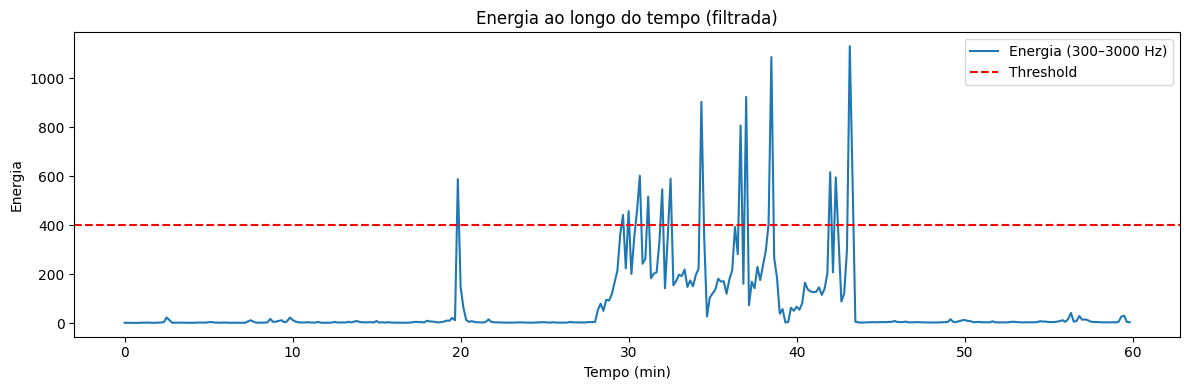

üìç Intervalos com energia acima do limiar:
 - 19:49
 - 29:40
 - 30:00
 - 30:30
 - 30:40
 - 31:10
 - 32:00
 - 32:30
 - 34:20
 - 36:39
 - 37:00
 - 38:20
 - 38:30
 - 42:00
 - 42:20
 - 43:09
 - 43:20


In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

# üìÇ Carrega o √°udio
audio_path = '../audio/15-11 - 1_00000_000.wav'
y, sr = librosa.load(audio_path, sr=None)

# üéöÔ∏è Aplica filtro passa-faixa (300‚Äì1500 Hz)
sos = scipy.signal.butter(10, [300, 1500], btype='bandpass', fs=sr, output='sos')
y_filtered = scipy.signal.sosfilt(sos, y)

# ‚öôÔ∏è Par√¢metros
window_duration = 10  # segundos
window_samples = window_duration * sr
energy_threshold = 400  # ajustar depois
energies = []
times = []
intervals = []

# üîÅ Analisa em janelas
for start in range(0, len(y_filtered), window_samples):
    end = min(start + window_samples, len(y_filtered))
    window = y_filtered[start:end]
    
    energy = np.sum(window**2)
    energies.append(energy)
    
    time_min = start / sr / 60  # minutos
    times.append(time_min)

    if energy > energy_threshold:
        minutos = int(time_min)
        segundos = int((time_min - minutos) * 60)
        intervalo = f"{minutos:02d}:{segundos:02d}"
        intervals.append(intervalo)

# üìà Visualiza√ß√£o
plt.figure(figsize=(12, 4))
plt.plot(times, energies, label='Energia (300‚Äì3000 Hz)')
plt.axhline(y=energy_threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel("Tempo (min)")
plt.ylabel("Energia")
plt.title("Energia ao longo do tempo (filtrada)")
plt.legend()
plt.tight_layout()
plt.show()

# üñ®Ô∏è Imprime intervalos suspeitos
print("üìç Intervalos com energia acima do limiar:")
for i in intervals:
    print(f" - {i}")